I have a directory with a bunch of csv files, some have a different number of columns than others. I want to read in all the csvs in the directory (ignoring sub-directories) as a pandas dataframes, then concatenate all the data frames (which should reorder any misordered columns, and fill in missing columns with NaN)

In [1]:
import glob
import pandas as pd
import numpy as np

In [2]:
#directory = '/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/z-score_normalized/'
directory = '/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/robustly_normalized/'
df = []
for file in glob.glob(directory + "*csv__robustly_NORMALIED.csv"): # reads through all files in this directory looking for *.csv and ignores sub-directories
    df.append(pd.read_csv(file, index_col=0))

In [3]:
# I could probably do everything in the above cell/for loop to improve efficiency

In [4]:
print(len(df))
print(df[0].head(n=2))

180
     7AAD A  7AAD H     BL3-A   BL3-H      BL5-A    BL5-H  CD14 A : PE A  \
0  348129.0  5029.0  544437.0  5925.0  2058549.0  16137.0      -414117.0   
1    1703.0  2359.0   -1497.0   566.0      -35.0   1185.0          239.0   

   CD14 H : PE H  CD16 A : APC A  CD16 H : APC H         ...          \
0         4139.0        264193.0          5158.0         ...           
1          329.0          3529.0          1853.0         ...           

   SSC-A_robust_scale  SSC-H_robust_scale  VL2-A_robust_scale  \
0           83.779371           36.817645            4.958773   
1            3.564883            2.187215           -0.529340   

   VL2-H_robust_scale  VL3-A_robust_scale  VL3-H_robust_scale  \
0           -0.620404           -1.218691           -0.526455   
1           -1.000158           -0.491984           -1.150442   

   VL5-A_robust_scale  VL5-H_robust_scale  VL6-A_robust_scale  \
0           -5.374378           -0.637426          202.549238   
1           -0.512054       

In [5]:
df[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9081 entries, 0 to 9080
Data columns (total 67 columns):
7AAD A                                            9081 non-null float64
7AAD H                                            9081 non-null float64
BL3-A                                             9081 non-null float64
BL3-H                                             9081 non-null float64
BL5-A                                             9081 non-null float64
BL5-H                                             9081 non-null float64
CD14 A : PE A                                     9081 non-null float64
CD14 H : PE H                                     9081 non-null float64
CD16 A : APC A                                    9081 non-null float64
CD16 H : APC H                                    9081 non-null float64
CD34 A : BV605 A                                  9081 non-null float64
CD34 H : BV605 H                                  9081 non-null float64
CD66B A : CD19 A : CD3 A : FI

In [6]:
concat_pd = pd.concat(df, ignore_index = True)

In [7]:
concat_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337871 entries, 0 to 1337870
Data columns (total 67 columns):
7AAD A                                            1337871 non-null float64
7AAD A_robust_scale                               1337871 non-null float64
7AAD H                                            1337871 non-null float64
7AAD H_robust_scale                               1337871 non-null float64
BL3-A                                             1337871 non-null float64
BL3-A_robust_scale                                1337871 non-null float64
BL3-H                                             1337871 non-null float64
BL3-H_robust_scale                                1337871 non-null float64
BL5-A                                             1337871 non-null float64
BL5-A_robust_scale                                1337871 non-null float64
BL5-H                                             1337871 non-null float64
BL5-H_robust_scale                                1337871 non-

In [8]:
zscore_cols = None; norm_out_cols = None; meta_data_cols = None; unnorm_cols = None; unnorm_cols_out = None; all_cols_out = None;

In [9]:
# Make list of columns related to z-scores and get these columns: width, cell_label, cell_plate, lineage, screen, well, Time
#keyword_of_int = "zscore"
keyword_of_int = "robust_scale"
zscore_cols = sorted([x for x in list(concat_pd.columns.values) if keyword_of_int in x])
# Make list of columns related to meta data/general info
meta_data_cols = ["Width","lineage","cell_label","screen","well","cell_plate","Time"]
# Combine the above two
norm_out_cols = zscore_cols + meta_data_cols
# Make list of unnormalized columns (not z-scored)
unnorm_cols = sorted([x for x in list(concat_pd.columns.values) if not keyword_of_int in x and x not in meta_data_cols])
unnorm_cols_out = unnorm_cols + meta_data_cols
# Make a list of all columns in the order that I want to output them: unnormalized, normalized, meta data
all_cols_out = unnorm_cols + zscore_cols + meta_data_cols

In [10]:
print(len(norm_out_cols))
print(len(unnorm_cols_out))
print(len(all_cols_out))
print(len(meta_data_cols))

37
37
67
7


In [11]:
concat_pd[all_cols_out].head(n=2)

,7AAD A,7AAD H,BL3-A,BL3-H,BL5-A,BL5-H,CD14 A : PE A,CD14 H : PE H,CD16 A : APC A,CD16 H : APC H,...,VL5-H_robust_scale,VL6-A_robust_scale,VL6-H_robust_scale,Width,lineage,cell_label,screen,well,cell_plate,Time
0,348129.0,5029.0,544437.0,5925.0,2058549.0,16137.0,-414117.0,4139.0,264193.0,5158.0,...,-0.637426,202.549238,6.417722,5288.0,parent,unlabelled,screen_525,well_c03,cell_plate_1,8377.0
1,1703.0,2359.0,-1497.0,566.0,-35.0,1185.0,239.0,329.0,3529.0,1853.0,...,-1.119807,0.143317,0.609177,36.0,parent,unlabelled,screen_525,well_c03,cell_plate_1,8377.0


In [12]:
print("File name is hardcoded in right now, make sure to change it")

File name is hardcoded in right now, make sure to change it


In [13]:
# Write file with unnormalized (no z-score) and metadata
#concat_pd[unnorm_cols_out].to_csv("/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/screen_525_cell_plate_1__all_wells_combined__unnormalized_only.csv")

In [14]:
# Write file with normalized (z-scores) and meta-data
#concat_pd[norm_out_cols].to_csv("/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/screen_525_cell_plate_1__all_wells_combined__normalized_only.csv")
concat_pd[norm_out_cols].to_csv("/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/screen_525_cell_plate_1__all_wells_combined__robustly_normalized_only.csv")

In [15]:
# Write all columns to file
#concat_pd[all_cols_out].to_csv("/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/screen_525_cell_plate_1__all_wells_combined__normalized_and_unnormalized.csv")
concat_pd[all_cols_out].to_csv("/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/screen_525_cell_plate_1__all_wells_combined__robustly_normalized_and_unnormalized.csv")

#### Use stacked histograms to see if the data is normalizing well 

In [22]:
%matplotlib notebook

<IPython.core.display.Javascript object>


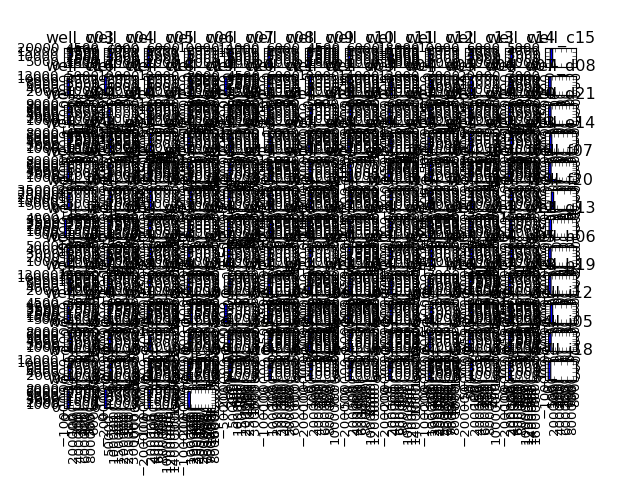

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1ee1e4e90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x204dc10d0>]], dtype=object)

In [24]:
concat_pd['BL3-H'].hist(by=concat_pd['well'])
